# Publishing SDs, Shapefiles and CSVs

Publishing your data can be accomplished in two simple steps:
1. Add the local data as an item to the portal
2. Call the publish() method on the item

This sample notebook shows how different types of GIS datasets can be added to the GIS, and published as web layers.

In [1]:
from IPython.display import display
from arcgis.gis import GIS
import os
gis = GIS("https://www.arcgis.com", "arcgis_python", "P@ssword123")


# Publish all the service definition files in a folder

The sample below lists all the service definition (.sd) files in a data directory and publishes them as web layers. To publish a service definition file, we first add the .sd file to the Portal, and then call the publish() method:

In [2]:
# path relative to this notebook
data_dir = "data/"

#Get list of all files
file_list = os.listdir(data_dir)

#Filter and get only .sd files
sd_file_list = [x for x in file_list if x.endswith(".sd")]
print("Number of .sd files found: " + str(len(sd_file_list)))

Number of .sd files found: 2


<Item title:"Nursing_home_locations" type:Feature Service owner:demo_deldev>
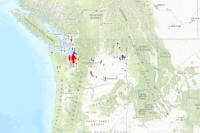

<Item title:"WA_DSHS_admin_boundaries" type:Map Service owner:demo_deldev>
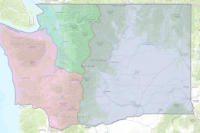

In [3]:
# Loop through each file and publish it as a service
for current_sd_file in sd_file_list:
    item = gis.content.add({}, data_dir + current_sd_file)   # .sd file is uploaded and a .sd file item is created
    published_item = item.publish()                          # .sd file item is published and a web layer item is created
    display(published_item)

In the example shown above, one .sd file produced a web feature layer and another produced a web tile layer

# Publish a feature service from a shapefile and update the item information

To publish a shapefile, we first add the zipped shapefile to the Portal as an item, then call publish() method on the item to create a web layer. Often times, your shape files or service definitions may not contain the metadata you want to show on the portal item. This sample demonstrates how you can update those properties after publishing a web layer.

In [4]:
data = "data/power_pedestals_2012.zip"
shpfile = gis.content.add({}, data)

In [5]:
shpfile

<Item title:"power_pedestals_2012" type:Shapefile owner:demo_deldev>

In [6]:
published_service = shpfile.publish()

In [7]:
display(published_service)

<Item title:"power_pedestals_2012" type:Feature Service owner:demo_deldev>

The web layer item has minimal information and a default thumbnail.

### Update the layer item's metadata
To update the metadata and set the thumbnail, use the update() method on the web layer's item obtained during publishing.

In [8]:
thumbnail_path = "data/power_pedestals_thumbnail.PNG"
item_properties = {"snippet":"""This dataset was collected from Utah DOT open data portal.
                            Source URL: <a href="http://udot.uplan.opendata.arcgis.com/
                            datasets/a627bb128ac44767832402f7f9bde909_10">http://udot.uplan.opendata.arcgis.com/
                            datasets/a627bb128ac44767832402f7f9bde909_10</a>""",
                   "title":"Locations of power pedestals collected in 2012",
                   "tags":"opendata"}

<Item title:"Locations of power pedestals collected in 2012" type:Feature Service owner:demo_deldev>
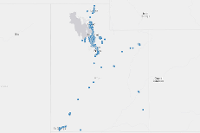

In [9]:
published_service.update(item_properties, thumbnail=thumbnail_path)
display(published_service)

# Publish a CSV file and move it into a folder

To publish a CSV file, we first add the .csv file to the Portal, and then call the publish() method to publish it as a layer. Once published, we create a destination folder on the server and then move the published items into that folder

In [10]:
csv_file = 'data/Chennai_precipitation.csv'
csv_item = gis.content.add({}, csv_file)

In [11]:
display(csv_item)

<Item title:"Chennai_precipitation" type:CSV owner:demo_deldev>

The csv file used in this sample has a column titled `LOCATION` containing place names in text. During the publishing process we specify this column as an `address_fields` parameter. The server geocodes these locations to create point features for the web layer.

In [12]:
csv_lyr = csv_item.publish(None, {"Address":"LOCATION"})

In [13]:
display(csv_lyr)

<Item title:"Chennai_precipitation" type:Feature Service owner:demo_deldev>

### Create a new folder for the items
The `create_folder()` from `GIS.content` can be used to create a new folder. Once created, the `move()` of the `Item` can be used to move the items into the folder.

In [14]:
# create a new folder called 'Rainfall Data'
new_folder_details = gis.content.create_folder("Rainfall Data")
print(new_folder_details)

{'id': '46e0403f31254aeba563dcaf8d8e2d5c', 'username': 'demo_deldev', 'title': 'Rainfall Data'}


In [15]:
# move both the csv_item and csv_lyr items into this new folder
csv_item.move(new_folder_details)  # Here you could either pass name of the folder or the dictionary
                                   # returned from create_folder() or folders property on a User object

csv_lyr.move(new_folder_details)

{'folder': '46e0403f31254aeba563dcaf8d8e2d5c',
 'itemId': '91c085e119e647f583a0dfbc1a281428',
 'owner': 'demo_deldev',
 'success': True}

Now that the items are moved, we can request for the item's `ownerFolder` property and ensure it matches the `id` of the folder created in the previous step

In [16]:
print(csv_lyr.ownerFolder)

46e0403f31254aeba563dcaf8d8e2d5c
